<center>
    <img src="https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/adsp_logo.png?raw=1">
</center>

### Prof. Dr. -Ing. Gerald Schuller <br> Jupyter Notebook: Renato Profeta


# Complex Signals and Filters, Hilbert Transform

In [14]:
%%html
<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/_f1rULreCok" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen referrerpolicy="strict-origin-when-cross-origin"></iframe>

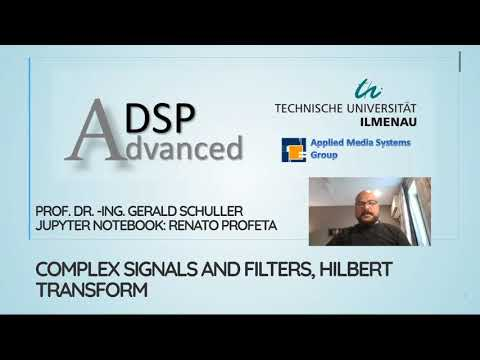

In [13]:
from IPython.display import YouTubeVideo

YouTubeVideo('_f1rULreCok', width=560, height=315)

Imagine we would like to know the precise, **instantaneous, amplitude of a sinusoid**.

Just looking at the function this might not be so easy, we would have to determine the maximum or minimum, and depending on the sinusoidal frequency this might take some time, during which the amplitude also might have changed. But if we have a **complex exponential** with samples

$$\large
x(n)=A \cdot e^{j \Omega n}= A \cdot cos(\Omega n)+ j A \cdot  sin(\Omega n)
$$
(we know x(n) but not A)

We can easily determine the amplitude A only knowing one complex valued sample x(n) by taking the magnitude of this complex exponential,
    
$$\large
A= \sqrt{\Re(x(n))^2+\Im(x(n))^2}=
$$

$$\large
=\sqrt{((A \cdot cos(\Omega n))^2 + (A \cdot sin(\Omega n))^2)
}$$

Observe that this computation of A is independent of the time index n, so it can be done at **every time instance**.

So if we not only have the sine or cosine function in itself, but both, we can easily compute the instantaneous amplitude in this way. This means, instead of just having the sinusoidal function, we also have the **90 degrees phase shifted** version of it, to compute the amplitude. The problem is, if we only have one part (e.g. the real part) how do we get this 90 degrees phase shifted version?



In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/uEaEv2qY5vM" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

For example, look at the sine function. It already consists of 2 complex exponentials,

$$\large
sin(\Omega n)=\frac{1} {2j} (e^{j\Omega n} - e^{-j\Omega n})
$$

we just have one exponential too many. If we look at it in the Fourier Domain, we see that one exponential is at positive frequencies, and the other is at negative frequencies. If we could remove one of the 2 exponentials, for instance at the negative frequencies, we would have reached our goal of obtaining a complex exponential for amplitude computations. So what we need is a filter, which **attenuates the negative frequencies**, and leaves the **positive frequencies unchanged**!

So how do we obtain such a filter? First we formulate our requirement in the **frequency domain** (the DTFT domain):


$$\large
H(\Omega)=\left \lbrace \substack { 1 \textrm{  for } \Omega > 0 \\ 0 \textrm{  for  } \Omega <0 }  \right \rbrace
$$

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/ZDnIH8Ns0GQ" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We could multiply our signal spectrum with this  frequency domain formulation (which is often not practical), or in the time domain convolve with the **impulse response** of the resulting filter obtained with **inverse DTFT**,

$$\large
h(n)=\frac{1}{2\pi}\int_{0}^{\pi}1\cdot e^{j\Omega n}d\Omega =
$$

for $n\neq 0$ this becomes

$$\large
=\frac{1}{2\pi}\left(\frac{1}{jn}\cdot e^{j\pi n} -\frac{1}{jn}\right)=
$$

$$\large
=\frac{1 } {2 \pi} \left( \frac{-j} {n} \cdot (-1)^n + \frac{j} {n} \right)=
$$

$$\large
=\left \lbrace \substack{\frac{j} {\pi n}\textrm{ for n odd }\\
0\textrm{ for n even} }  \right \rbrace
$$

For n=0 this inverse DTFT integral becomes

$$\large
h(0)=\frac{1}{2\pi}\cdot \pi=\frac{1}{2}
$$


Hence the resulting impulse response of this one-sided filter becomes

$$\large
h(n) = \frac{1} {2} \cdot \delta(n) + \left \lbrace \substack{\frac{j}  {\pi n} \textrm{for n odd}  \\  0 \textrm{ for n even } }  \right \rbrace
$$

This is now the **resulting impulse response** (time domain) of our **filter which passes all the positive frequencies and attenuates the negative frequencies**.



Here we can see that the first part with the **delta function** represents the **real part**, which is the signal itself (signal convolved with the delta impulse), except for a factor of 2. The second part represents the imaginary part of our one-sided signal (pos. frequencies). Multiplying both parts with this factor of 2 for simplicity, we obtain the following structure,
<center>
    <img src='https://github.com/GuitarsAI/ADSP_Tutorials/blob/master/images/Lecture11-1.PNG?raw=1' width="600">
</center>


where the **Hilbert Transformer**
$h_H(n)$ is

$$\large
h_H(n)=\left \lbrace \substack{ \frac{2}  {\pi n} \textrm{ for n odd }  \\   \textrm{ 0 for n even }}  \right \rbrace
$$

(See also: Oppenheim, Schafer, “Discrete-Time Signal Processing”). The x(n) is our real valued signal. Observe that only this part, which creates the imaginary signal part, is the Hilbert Transformer. We can use it to construct a filter that suppresses the negative frequencies.

This means, we take our **original signal** (the sinusoid) and **define it as our real part**. Then we take the **Hilbert filtered signal**, filtered with the above $h_H(n)$, and define it as our **imaginary part**. Then both together have a **one-sided, positive only spectrum**! That also means, our Hilbert transform filter is our **90 degrees phase shifter** that we where looking for!

You can also imagine, if the real part is a $cos$ signal, then the Hilbert Transformer generates the $j\cdot sin$ part.

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/t6FXEhn4x04" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

#### **Python example**: Plot the Hilbert transformer for n= -10 ..10:


In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/JiJIKy_GmbQ" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

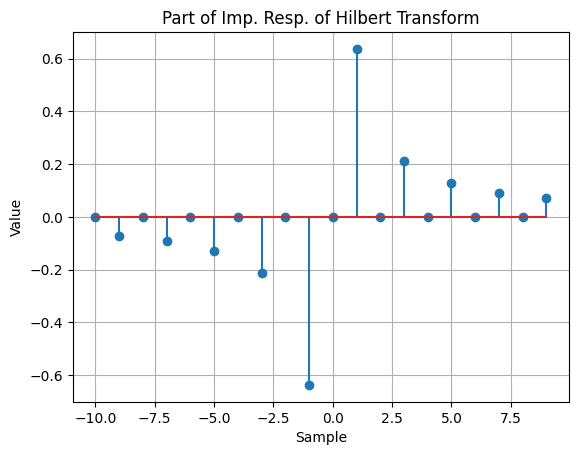

In [3]:
%matplotlib inline
#The above code is only for jupyter
#notebook for interactive graph
import matplotlib.pyplot as plt
import numpy as np
h=np.zeros(20);
n=np.arange(-9,10, 2);
h[n+10] = 2/(np.pi*n)

plt.figure()
plt.stem(np.arange(-10,10),h)
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Part of Imp. Resp. of Hilbert Transform')
plt.grid()

Here we see that we have negative indices. If we want to obtain a causal system, we need to shift them to at or above zero using a suitable **delay**, hence the Hilbert transform involves some **delay**. Hence to make the imaginary and real part to fit to each other, we have to **delay the real part accordingly**.

This type of complex signal, with a 1-sided spectrum, is also called an “**analytic signal**”.

Let's take a look at the frequency response of our filter. Since we have included a delay, our phase should be our **90 degrees (pi/2 Rad) phase shift** plus the linear phase from the delay. Hence our phase curve should hit the phase axis at frequency 0 at $\dfrac{\pi}{2} Rad$, for which we would like to zoom in to this part $\left(\dfrac{\pi}{2}+\Omega*d\right)$.
   

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/n_D4xXQahQQ" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-1419568508.py:19: SyntaxWarning: invalid escape sequence '\p'
  lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
/tmp/ipython-input-1419568508.py:29: SyntaxWarning: invalid escape sequence '\p'
  lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'


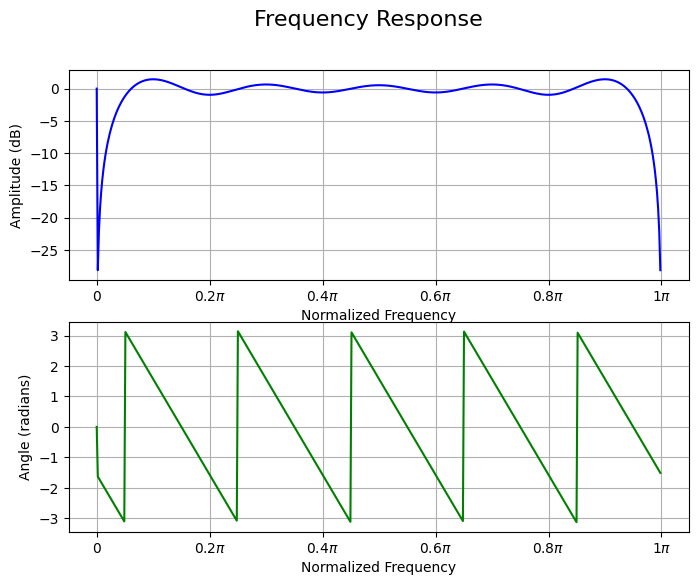

In [4]:
# Frequency Response

from scipy.signal import freqz
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

w, h_response  = freqz(h)

fig=plt.figure(figsize=(8,6))
fig.suptitle('Frequency Response', fontsize=16)
plt.subplot(2,1,1)
plt.plot(w/np.pi, 20 * np.log10(abs(h_response), where=abs(h_response) > 0), 'b')
#plt.ylim((-0.001,0.001))
plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.subplot(2,1,2)
angles = np.angle(h_response)
plt.plot(w/np.pi, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.grid()


Here we can see that the phase curve indeed would hit the $\dfrac{pi}{2}$ Rad (90 degree) mark at the phase axis. We see that the magnitude plot only reaches about 0 dB attenuation at about frequency $0.08\cdot \pi$ and reaches higher attenuations at frequencies below about $0.05\cdot \pi$ and above about $0.95\cdot \pi$. Hence it is only a working Hilbert transformer within this frequency range.

If we want to plot the frequency response of our **entire filter** (not just the Hilbert transformer part), which **passes only the positive frequencies**, we first need to construct our resulting complex filter, and then plot the frequency response on the **whole** frequency circle. First we need to create the correspondingly delayed unit impulse as the real part:

In [5]:
# construct a delayed impulse to implement the
# delay for the real part:
delt = np.zeros(20)
delt[9] = 1
#delt =
#0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
#Then we need to add our imaginary part as our
#Hilbert transform to obtain our complex filter:
h = np.zeros(20);
n = np.arange(-9, 10+1, 2);
h[(n-1)+10] = 2./(np.pi*n);
hone = delt+h*1j

hone


array([0.-0.07073553j, 0.+0.j        , 0.-0.09094568j, 0.+0.j        ,
       0.-0.12732395j, 0.+0.j        , 0.-0.21220659j, 0.+0.j        ,
       0.-0.63661977j, 1.+0.j        , 0.+0.63661977j, 0.+0.j        ,
       0.+0.21220659j, 0.+0.j        , 0.+0.12732395j, 0.+0.j        ,
       0.+0.09094568j, 0.+0.j        , 0.+0.07073553j, 0.+0.j        ])

Observe that this is our first complex valued filter!

Its frequency response, including negative frequencies above $\pi$, is:

<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:29: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-1914118401.py:19: SyntaxWarning: invalid escape sequence '\p'
  lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
/tmp/ipython-input-1914118401.py:29: SyntaxWarning: invalid escape sequence '\p'
  lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'


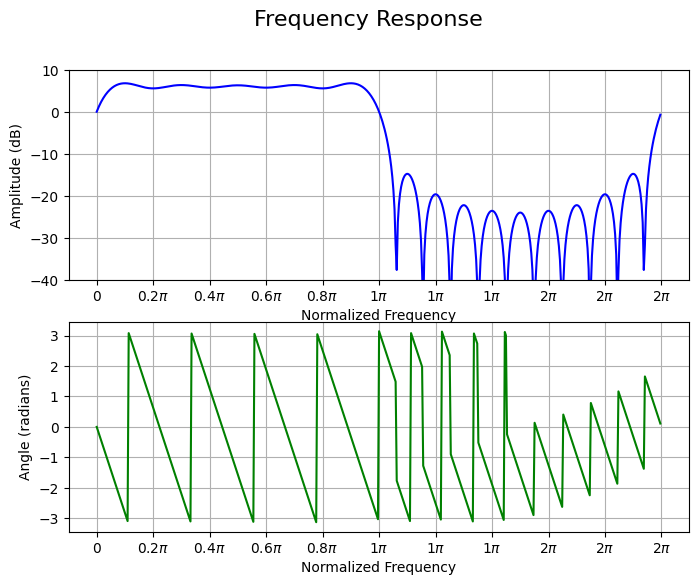

In [6]:
# Frequency Response

from scipy.signal import freqz
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

w, h_response  = freqz(hone, whole=True)

fig=plt.figure(figsize=(8,6))
fig.suptitle('Frequency Response', fontsize=16)
plt.subplot(2,1,1)
plt.plot(w/np.pi, 20 * np.log10(abs(h_response), where=abs(h_response) > 0), 'b')
plt.ylim((-40,10))
plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.subplot(2,1,2)
angles = np.angle(h_response)
plt.plot(w/np.pi, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.grid()


Here we can see that we have indeed a **passband** at the **positive frequencies** between 0 and $\pi$. Observe that the passband is at about 6 dB (above 0dB), because we multiplied our filter by a factor of 2 to make it simpler.

The negative frequencies appear between $\pi$ and $2*\pi$ on the frequency axis, and we can see that we get about -30 dB attenuation there, which is not very much, but which we could increase it by making the filter longer. This also gives us a good indication of how well our filter is working!

The Python function “remez” also has an option for a Hilbert transform filter. We get a similar design with:

<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2496927083.py:23: SyntaxWarning: invalid escape sequence '\p'
  lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
/tmp/ipython-input-2496927083.py:33: SyntaxWarning: invalid escape sequence '\p'
  lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'


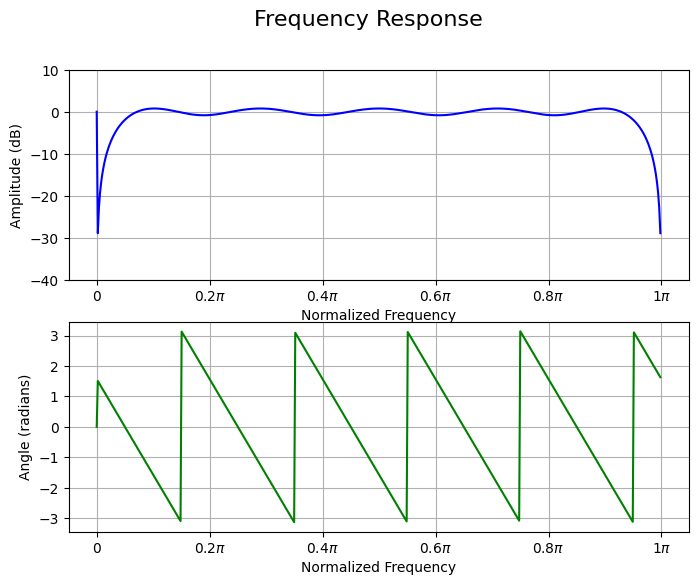

In [7]:
import scipy.signal as sp
b=sp.remez(numtaps=21, bands=[0.03, 0.47],desired=[1], type='hilbert');


# Frequency Response

from scipy.signal import freqz
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

w, h_response  = freqz(b, whole=False)

fig=plt.figure(figsize=(8,6))
fig.suptitle('Frequency Response', fontsize=16)
plt.subplot(2,1,1)
plt.plot(w/np.pi, 20 * np.log10(abs(h_response), where=abs(h_response) > 0), 'b')
plt.ylim((-40,10))
plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.subplot(2,1,2)
angles = np.angle(h_response)
plt.plot(w/np.pi, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.grid()


Observe that the specified passband does not go all the way to 0 and 0.5. The further away the passband is from these edges, the less ripples we will have in the passband, and the **more attenuation** we will have for the **negative frequencies**!

Observe that this design now has a +90 Degrees ($\pi/2$) phase shift at frequency close to zero. This is a phase difference of 180 Degrees from our previous design with the rectangular window, and results from a sign change of the coefficients.

Let's look at the resulting **one sided complex valued filter** at the whole frequency circle again, in iPython:


In [8]:
#Delay for the real part:
delt = np.zeros(21)
delt[10] = 1
#The complex filter:
honeremez = delt + 1j*b
honeremez

array([0.-8.35889141e-05j, 0.+7.28072838e-02j, 0.+7.11334936e-05j,
       0.+6.79343477e-02j, 0.-7.21513298e-06j, 0.+1.10111613e-01j,
       0.+2.67809302e-05j, 0.+2.01516354e-01j, 0.-8.96356182e-06j,
       0.+6.32971502e-01j, 1.+0.00000000e+00j, 0.-6.32971502e-01j,
       0.+8.96356182e-06j, 0.-2.01516354e-01j, 0.-2.67809302e-05j,
       0.-1.10111613e-01j, 0.+7.21513298e-06j, 0.-6.79343477e-02j,
       0.-7.11334936e-05j, 0.-7.28072838e-02j, 0.+8.35889141e-05j])

<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-952376332.py:25: SyntaxWarning: invalid escape sequence '\p'
  lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
/tmp/ipython-input-952376332.py:35: SyntaxWarning: invalid escape sequence '\p'
  lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'


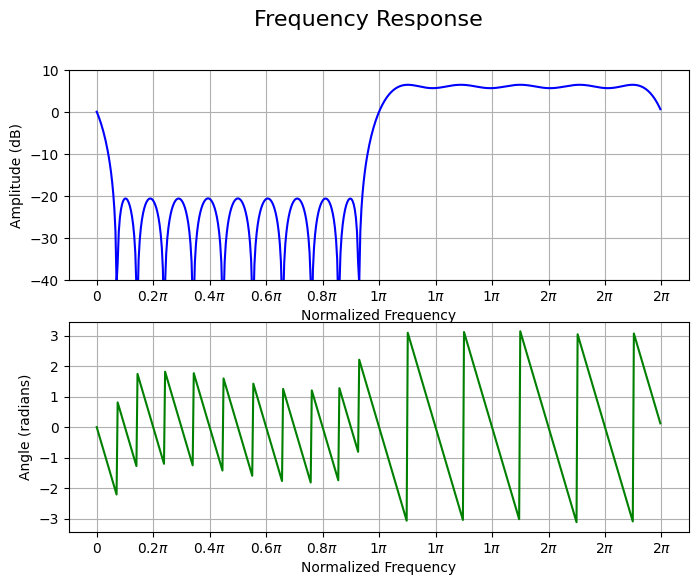

In [9]:
#Observe the sign change
#compared to hone above.
#Now look at the frequency response
#for pos. and neg. frequencies:


# Frequency Response

from scipy.signal import freqz
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

w, h_response  = freqz(honeremez, whole=True)

fig=plt.figure(figsize=(8,6))
fig.suptitle('Frequency Response', fontsize=16)
plt.subplot(2,1,1)
plt.plot(w/np.pi, 20 * np.log10(abs(h_response), where=abs(h_response) > 0), 'b')
plt.ylim((-40,10))
plt.ylabel('Amplitude (dB)')
plt.xlabel('Normalized Frequency')
plt.grid()
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.subplot(2,1,2)
angles = np.angle(h_response)
plt.plot(w/np.pi, angles, 'g')
plt.ylabel('Angle (radians)')
plt.xlabel('Normalized Frequency')
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=0.2))
plt.grid()


Here we can see that we have again only about -30 dB attenuation in the stopband, which is now for the positive frequencies, because of the sign change of our remez filter.  We obtain more practical filters, with more attenuation in the stopband, if we change the corner frequencies to more above 0 and below 0.5 in remez (increasing the transition bandwidth).

Also observe the equi-ripple behaviour in the stopband, which is what we expect from remez.

## Example for the Measurement of the (Instantaneous) Amplitude

We can now test our application example of measuring the Amplitude of a sinusoid with our Hilbert transform design. We saw that the lower end for the passband of our design is at normalized frequency of about 0.05. Hence we test a sinusoid of that frequency,

In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/w9X0D2fD0-g" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

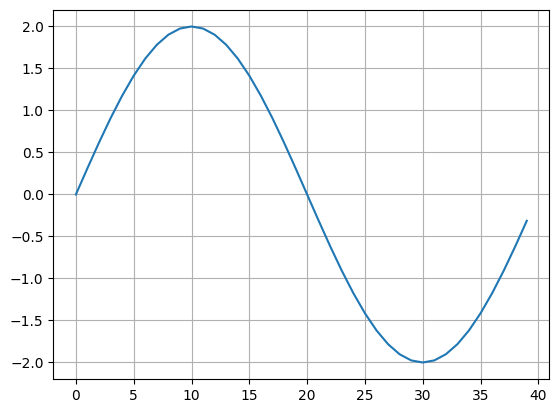

In [10]:
x = 2*np.sin(np.pi*0.05*np.arange(0, 40))
plt.figure()
plt.plot(x)
plt.grid()

Now we can filter it with our filter which passes only positive frequencies “hone”, an creates a complex valued signal xhone:

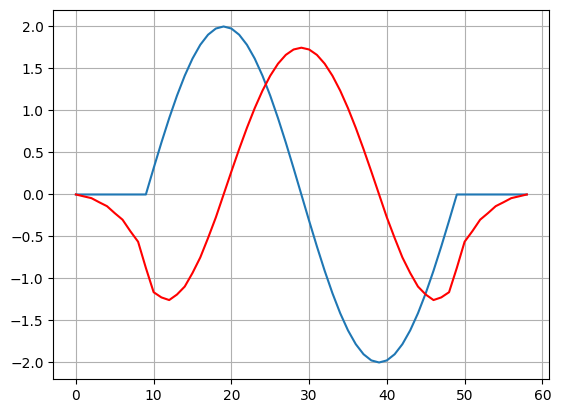

In [11]:
xhone = sp.convolve(x, hone)
plt.figure()
plt.plot(np.real(xhone))
plt.plot(np.imag(xhone),'r')
plt.grid()

Here we can see that we get indeed a 90 degree phase shifted version, the red curve, about between sample 15 and 45.

Now we can compute the magnitude of this complex signal “xhone” to obtain the amplitude of our sinusoidal signal,

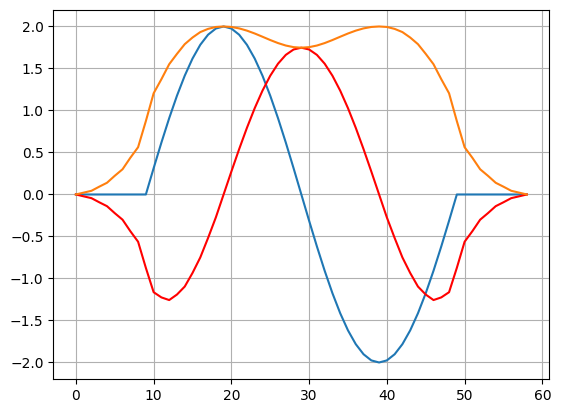

In [12]:
plt.figure()
plt.plot(np.real(xhone))
plt.plot(np.imag(xhone),'r')
plt.plot(np.abs(xhone))
plt.grid()

We see that between about sample 15 and 45 we obtain the **amplitude** of our sinusoidal signal with about **10% accuracy**, which roughly corresponds to the -20dB attenuation (corresponding to an attenuation factor of 0.1) that our filter “hone” provides. This also hints at the fact that we can improve the magnitude estimation by having a filter with a **higher attenuation** at negative frequencies.

Also observe that this only works for sinusoids inside our
passband!